In [1]:
import pandas as pd
import numpy as np

In [ ]:
# # !pip install datatable
# import datatable as dt

# new_data = dt.fread("/content/drive/MyDrive/DM_project/filtered_data.csv")
# new_data = new_data.to_pandas()
# new_data = new_data.drop(new_data.columns[0], axis=1)
# new_data.head()

In [105]:
data = pd.read_excel('./data/NWSD.xlsx')
data = data[data['SPECIES_ID'].astype(str).str.match(r'\D')]    # 새만 필터링
data['SPECIES'] = data['SPECIES'].astype(str).str.lower()   # 소문자로 통일

In [ ]:
# birds = data[data['SPECIES_ID'].astype(str).str.match(r'\D')]['SPECIES'].unique()   # 종 코드가 숫자로 시작하는 포유류/파충류 13202건 제외
# birds = np.char.lower(birds.astype(str))    # 이름 형식 통일
# pd.DataFrame(birds).to_csv("birds.csv", index=False, header=False)

In [40]:
america = ['AK', 'AL', 'AR', 'AS', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'GU', 'HI', 'IA', 'ID', 'IL', 'IN', 
           'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MP', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 
           'OH', 'OK', 'OR', 'PA', 'PR', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VI', 'VT', 'WA', 'WI', 'WV', 'WY']
canada = ['AB', 'BC', 'MB', 'NB', 'NL', 'NT', 'NS', 'NU', 'ON', 'PE', 'QC', 'SK', 'YT']

In [74]:
states = data['STATE'].unique()
states_to_drop = [state for state in states if state not in america and state not in canada]
states_to_drop     # UM: 유나이티드 마셜 제도, MH: 마셜 제도 / FN: Foregin National로 추측됨. 외국

[nan, 'FN', 'UM', 'MH']

In [ ]:
data = data[~data['STATE'].isin(states_to_drop)]    # 본토가 아닌 것 제외

In [81]:
not_use_ID = ['ZZZZ', 'H2O', 'PVT', 'RIGG']     # unknown, 해상, 개인소유, 시추선..?뭐라고 하지
data = data[~data['AIRPORT_ID'].isin(not_use_ID)] 

1507

In [97]:
# is.na(AIRPORT_LATITUDE) & !(AIRPORT_ID %in% not_use_ID) 

data['AIRPORT_LATITUDE'].isna()

0         False
1         False
2         False
3         False
4         False
          ...  
317619    False
317620    False
317621    False
317622    False
317623    False
Name: AIRPORT_LATITUDE, Length: 259972, dtype: bool

In [80]:
print('##### ')
print(data['SKY'].value_counts(dropna=False))

##### 
SKY
NaN           124449
No Cloud       65014
Some Cloud     46775
Overcast       23734
Name: count, dtype: int64


In [ ]:
# 제외할 컬럼들
cols_to_drop = ['INDEX_NR',
                'REPORTED_NAME', 'REPORTED_TITLE', 'REPORTED_DATE', 'SOURCE', 'PERSON', 'LUPDATE', 'TRANSFER']

Index(['INDEX_NR', 'INCIDENT_DATE', 'INCIDENT_MONTH', 'INCIDENT_YEAR', 'TIME',
       'TIME_OF_DAY', 'AIRPORT_ID', 'AIRPORT', 'AIRPORT_LATITUDE',
       'AIRPORT_LONGITUDE',
       ...
       'ENROUTE_STATE', 'NR_INJURIES', 'NR_FATALITIES', 'COMMENTS',
       'REPORTED_NAME', 'REPORTED_TITLE', 'SOURCE', 'PERSON', 'LUPDATE',
       'TRANSFER'],
      dtype='object', length=101)

In [25]:
for col in data.columns:
    print(f"컬럼명:{col}")
    print("고유값 개수: ", data[col].nunique(dropna=False))
    print("결측치 개수: ", data[col].isna().sum())
    print()

컬럼명:INDEX_NR
고유값 개수:  317624
결측치 개수:  0

컬럼명:INCIDENT_DATE
고유값 개수:  12743
결측치 개수:  0

컬럼명:INCIDENT_MONTH
고유값 개수:  12
결측치 개수:  0

컬럼명:INCIDENT_YEAR
고유값 개수:  36
결측치 개수:  0

컬럼명:TIME
고유값 개수:  1442
결측치 개수:  122435

컬럼명:TIME_OF_DAY
고유값 개수:  5
결측치 개수:  139242

컬럼명:AIRPORT_ID
고유값 개수:  2703
결측치 개수:  0

컬럼명:AIRPORT
고유값 개수:  2703
결측치 개수:  0

컬럼명:AIRPORT_LATITUDE
고유값 개수:  2694
결측치 개수:  41042

컬럼명:AIRPORT_LONGITUDE
고유값 개수:  2695
결측치 개수:  41043

컬럼명:RUNWAY
고유값 개수:  1340
결측치 개수:  78076

컬럼명:STATE
고유값 개수:  68
결측치 개수:  41042

컬럼명:FAAREGION
고유값 개수:  11
결측치 개수:  41042

컬럼명:LOCATION
고유값 개수:  9520
결측치 개수:  278224

컬럼명:OPID
고유값 개수:  623
결측치 개수:  4

컬럼명:OPERATOR
고유값 개수:  619
결측치 개수:  0

컬럼명:REG
고유값 개수:  44753
결측치 개수:  125153

컬럼명:FLT
고유값 개수:  10796
결측치 개수:  170945

컬럼명:AIRCRAFT
고유값 개수:  613
결측치 개수:  0

컬럼명:AMA
고유값 개수:  95
결측치 개수:  92007

컬럼명:AMO
고유값 개수:  64
결측치 개수:  117985

컬럼명:EMA
고유값 개수:  37
결측치 개수:  106326

컬럼명:EMO
고유값 개수:  50
결측치 개수:  114953

컬럼명:AC_CLASS
고유값 개수:  6
결측치 개수:  90435

컬럼명:AC_MASS
고유값 개수:  

In [69]:
data[(data['AIRCRAFT'] == 'UNKNOWN') | (data['AIRCRAFT'] == 'Unknown')]

,INDEX_NR,INCIDENT_DATE,INCIDENT_MONTH,INCIDENT_YEAR,TIME,TIME_OF_DAY,AIRPORT_ID,AIRPORT,AIRPORT_LATITUDE,AIRPORT_LONGITUDE,...,ENROUTE_STATE,NR_INJURIES,NR_FATALITIES,COMMENTS,REPORTED_NAME,REPORTED_TITLE,SOURCE,PERSON,LUPDATE,TRANSFER
69,608323,1991-07-07,7,1991,NaN,NaN,KACY,ATLANTIC CITY INTL,39.45758,-74.57717,...,NaN,NaN,NaN,/Legacy Record 100082/,REDACTED,REDACTED,FAA Form 5200-7,Carcass Found,2000-01-20,0
73,608327,1991-01-10,1,1991,NaN,Day,KATL,HARTSFIELD - JACKSON ATLANTA INTL ARPT,33.64044,-84.42694,...,NaN,NaN,NaN,A/C BA-14 /Legacy Record 100086/,REDACTED,REDACTED,FAA Form 5200-7,Airport Operations,1997-12-12,0
133,608406,1992-08-25,8,1992,NaN,NaN,KPIT,PITTSBURGH INTL ARPT,40.49147,-80.23287,...,NaN,NaN,NaN,(6/2/14 UPDATED EOF) /Legacy Record 100165/,REDACTED,REDACTED,FAA Form 5200-7,Carcass Found,2000-01-20,0
200,608482,1995-06-24,6,1995,NaN,NaN,KDEN,DENVER INTL AIRPORT,39.85841,-104.667,...,NaN,NaN,NaN,/Legacy Record 100242/,REDACTED,REDACTED,Air Transport Report,Air Transport Operations,2007-12-20,0
239,608528,1991-10-21,10,1991,NaN,NaN,KTEB,TETERBORO AIRPORT,40.8501,-74.06084,...,NaN,NaN,NaN,/Legacy Record 100288/,REDACTED,REDACTED,FAA Form 5200-7,Carcass Found,2000-01-20,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317592,1624231,2024-12-13,12,2024,,NaN,KMHR,SACRAMENTO MATHER ARPT,38.5539,-121.29759,...,NaN,NaN,NaN,NaN,REDACTED,REDACTED,FAA Form 5200-7-E,Carcass Found,2025-04-15,0
317595,1624234,2024-12-25,12,2024,,NaN,KGSP,GREENVILLE-SPARTANBURG INTL,34.89567,-82.21886,...,NaN,NaN,NaN,NaN,REDACTED,REDACTED,FAA Form 5200-7-E,Carcass Found,2025-04-15,0
317598,1624237,2024-12-09,12,2024,,NaN,KSJC,NORMAN Y. MINETA SAN JOSE INTL ARPT,37.36186,-121.92901,...,NaN,NaN,NaN,NaN,REDACTED,REDACTED,FAA Form 5200-7-E,Carcass Found,2025-04-15,0
317599,1624238,2024-12-13,12,2024,,NaN,KPIA,PEORIA INTL ARPT,40.66424,-89.69331,...,NaN,NaN,NaN,NaN,REDACTED,REDACTED,FAA Form 5200-7-E,Carcass Found,2025-04-15,0


In [67]:
sorted(data['AIRCRAFT'].unique())

['A-220',
 'A-300',
 'A-310',
 'A-318',
 'A-319',
 'A-320',
 'A-321',
 'A-330',
 'A-340',
 'A-350',
 'A-380',
 'A-7',
 'AA-1',
 'AA-5',
 'AC-130',
 'AERO AT-4',
 'AERO COMMANDER 100',
 'AERO COMMANDER 500',
 'AERO L-159E ALCA',
 'AERONCA 15AC SEDAN',
 'AERONCA 7AC CHAMPION',
 'AEROS 350',
 'AEROS 355',
 'AEROS SA 330 PUMA',
 'AEROS SA315',
 'AEROS SA341',
 'AEROS SA360',
 'AEROS SA365',
 'AEROS SN601',
 'AEROSTAR 600',
 'AG-5B',
 'AH-64 APACHE',
 'AIRBUS',
 'AIRBUS 377SGT',
 'AMD ALARUS CH2000',
 'ANTONOV 124',
 'AT-301',
 'AT-400',
 'AT-502',
 'AT-602',
 'AT-802',
 'ATR-42',
 'ATR-72',
 'AVIAT HUSKY A-1',
 'AVIAT PITTS S1',
 'AVIONS PIERRE ROBIN R-2160',
 'AW 101',
 'AW 109',
 'AW 119',
 'AW 139',
 'AW 169',
 'AW 189',
 'AW139',
 'AYRES THRUSH',
 'B C-17 GLOBEMASTER',
 'B-29 SUPERFORTRESS',
 'B-707',
 'B-717-200',
 'B-727',
 'B-727-100',
 'B-727-200',
 'B-737',
 'B-737-10',
 'B-737-100',
 'B-737-200',
 'B-737-300',
 'B-737-400',
 'B-737-500',
 'B-737-600',
 'B-737-7',
 'B-737-700',
 '

In [73]:
data[data['AIRPORT'] == 'ISTANBUL AIRPORT']['STATE']

254928    FN
Name: STATE, dtype: object

In [109]:
# 인천? => ID RKSI
data[data['AIRPORT_ID'] == 'RKSI']['DAMAGE_LEVEL']

40704      N
42140      N
45585      N
46066      N
46417      N
47092      N
57333      N
57506      N
57770      N
58877      N
67250      N
75255      N
77171      N
78908      M
83147      N
84639      N
96396      N
97107      N
99095      S
101738     N
106119     N
111739     N
115893     N
116915     N
128154     N
133130     N
136857     N
151017     N
161205     N
167007     N
178017     N
221456     N
221529     N
222112    M?
230588     N
239722     N
242375     N
244049     N
252989     N
253069     N
253145     N
254711     N
258373     N
259090     N
267541     N
312339     N
Name: DAMAGE_LEVEL, dtype: object

<Axes: >

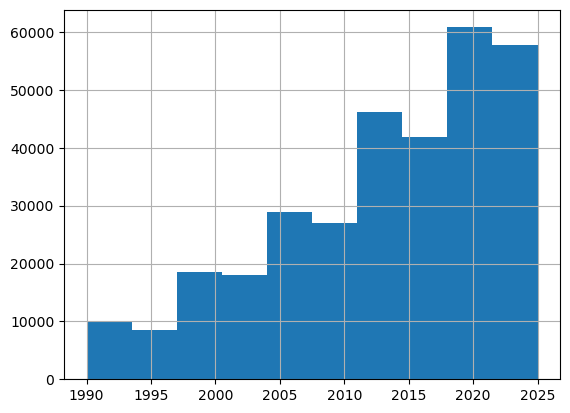

In [67]:
data['INCIDENT_YEAR'].hist()

##### Y 관련

In [ ]:
## response 관련 변수들

# parts = ['RAD', 'WINDSHLD', 'NOSE', 'ENG1', 'ENG2', 'ENG3', 'ENG4', 'PROP', 'WING_ROT', 'FUSE', 'LG', 'TAIL', 'LGHTS', 'OTHER']
# types = ['STR', 'DAM']
# from itertools import product
# [f"{t}_{p}" for p, t in product(parts, types)]

to_response = ['STR_RAD',
 'DAM_RAD',
 'STR_WINDSHLD',
 'DAM_WINDSHLD',
 'STR_NOSE',
 'DAM_NOSE',
 'STR_ENG1',
 'DAM_ENG1',
 'ING_ENG1',
 'STR_ENG2',
 'DAM_ENG2',
 'ING_ENG2',
 'STR_ENG3',
 'DAM_ENG3',
 'ING_ENG3',
 'STR_ENG4',
 'DAM_ENG4',
 'ING_ENG4',
 'INGESTED_OTHER',
 'STR_PROP',
 'DAM_PROP',
 'STR_WING_ROT',
 'DAM_WING_ROT',
 'STR_FUSE',
 'DAM_FUSE',
 'STR_LG',
 'DAM_LG',
 'STR_TAIL',
 'DAM_TAIL',
 'STR_LGHTS',
 'DAM_LGHTS',
 'STR_OTHER',
 'DAM_OTHER',
 'OTHER_SPECIFY']

##### 새 관련

In [ ]:
not_in_list = pd.read_csv("./data/not_in_list.csv")     # ebridst sample data에 없던 종 이름들

In [ ]:
np.array(not_in_list['name'])   # 250개

array(['unknown bird - medium', 'unknown bird - small',
       'unknown bird - large', 'blackbirds', 'gulls',
       'raptors: hawks, eagles, vultures, kites, osprey, falcons, caracaras',
       'hawks', 'sparrows', 'ducks', 'rails', 'geese', 'herons',
       'swallows', 'doves', 'hawaiian duck', 'egrets', 'wrens', 'crows',
       'terns, noddies', 'american barn owl', 'pacific golden-plover',
       'new world vultures', 'sandpipers, curlews, phalaropes, allies',
       'owls', 'great frigatebird', 'ducks, geese, swans', 'thrushes',
       'western cattle egret', 'finches, euphonias', 'munias',
       'zebra dove', 'eurasian wigeon', 'pelicans', 'orioles', 'plovers',
       'pigeons, doves', 'chestnut munia', 'helmeted guineafowl',
       'grackles', 'ptarmigans', 'grebes', 'meadowlarks',
       'new world quail', 'swans', 'pigeons', 'eagles', 'woodpeckers',
       'unknown bird', 'falcons, caracaras', 'parrots', 'ibises',
       'chickadees', 'perching birds (y)', 'yellow bittern',
 

In [63]:
# unknown, -s로 끝나는 복수형, ','가 포함된 두 종 이상의 군집? 을 제외한 것들
data[data['SPECIES'].str.contains(',') | data['SPECIES'].str.endswith('s')]['SPECIES'].unique()

array(['blackbirds', 'gulls',
       'raptors: hawks, eagles, vultures, kites, osprey, falcons, caracaras',
       'hawks', 'sparrows', 'ducks', 'rails', 'herons', 'swallows',
       'doves', 'egrets', 'wrens', 'crows', 'terns, noddies',
       'new world vultures', 'sandpipers, curlews, phalaropes, allies',
       'owls', 'ducks, geese, swans', 'thrushes', 'finches, euphonias',
       'munias', 'pelicans', 'orioles', 'plovers', 'pigeons, doves',
       'grackles', 'ptarmigans', 'grebes', 'white ibis', 'meadowlarks',
       'swans', 'pigeons', 'eagles', 'woodpeckers', 'falcons, caracaras',
       'parrots', 'ibises', 'chickadees', 'tropicbirds', 'glossy ibis',
       'lesser yellowlegs', 'old world vultures',
       'new world wood-warblers', 'swifts', 'laysan albatross',
       'white-faced ibis', 'black-footed albatross',
       'tyrant (new world) flycatchers', 'vireos', 'nightjars',
       'hummingbirds', 'cormorants', 'greater yellowlegs', 'cuckoos',
       'waxbills, mannikins, p

In [24]:
# data[data['SPECIES_ID'] == 'YI001' ]['SPECIES']
data[data['SPECIES'] == 'White-winged swallow' ]['SPECIES_ID']

258632    YI015
259810    YI015
Name: SPECIES_ID, dtype: object

In [101]:
data[data['SPECIES'] == 'Mugimaki flycatcher']   # 노랑딱새

,INDEX_NR,INCIDENT_DATE,INCIDENT_MONTH,INCIDENT_YEAR,TIME,TIME_OF_DAY,AIRPORT_ID,AIRPORT,AIRPORT_LATITUDE,AIRPORT_LONGITUDE,...,ENROUTE_STATE,NR_INJURIES,NR_FATALITIES,COMMENTS,REPORTED_NAME,REPORTED_TITLE,SOURCE,PERSON,LUPDATE,TRANSFER
312339,1612688,2024-10-04,10,2024,22:33,Night,RKSI,INCHEON INTL,37.469075,126.450517,...,NaN,NaN,NaN,NOTE: NUMBER STRUCK NOT REPORTED ASSUME 1.,REDACTED,REDACTED,FAA Form 5200-7-E,Air Transport Operations,2025-02-26,0


In [103]:
data[data['SPECIES'] == 'Mugimaki flycatcher']['STATE']    # FN
data[data['STATE'] == 'FN']

,INDEX_NR,INCIDENT_DATE,INCIDENT_MONTH,INCIDENT_YEAR,TIME,TIME_OF_DAY,AIRPORT_ID,AIRPORT,AIRPORT_LATITUDE,AIRPORT_LONGITUDE,...,ENROUTE_STATE,NR_INJURIES,NR_FATALITIES,COMMENTS,REPORTED_NAME,REPORTED_TITLE,SOURCE,PERSON,LUPDATE,TRANSFER
419,608753,1991-01-18,1,1991,NaN,Day,MROC,JUAN SANTAMARIA INTL,9.993861,-84.208806,...,NaN,NaN,NaN,/Legacy Record 100513/,REDACTED,REDACTED,FAA Form 5200-7,Pilot,2007-06-26,0
664,609042,1995-04-18,4,1995,NaN,NaN,MROC,JUAN SANTAMARIA INTL,9.993861,-84.208806,...,NaN,NaN,NaN,/Legacy Record 100802/,REDACTED,REDACTED,Air Transport Report,Air Transport Operations,2007-12-20,0
838,609254,1990-06-13,6,1990,NaN,NaN,TLPL,HEWANORRA ST LUCIA,13.733194,-60.952597,...,NaN,NaN,NaN,SOURCE FAA 3830 BIRD STRIKE/INCID REPT /Lega...,REDACTED,REDACTED,Other,Pilot,1999-03-12,0
852,609268,1990-04-28,4,1990,NaN,Night,MMGL,MIGUEL HIDALGO Y COSTILLA GUADALAJARA INTL,20.5218,-103.311167,...,NaN,NaN,NaN,/Legacy Record 101028/,REDACTED,REDACTED,FAA Form 5200-7,NaN,1999-03-09,0
934,609370,1995-05-24,5,1995,NaN,NaN,MROC,JUAN SANTAMARIA INTL,9.993861,-84.208806,...,NaN,NaN,NaN,/Legacy Record 101131/,REDACTED,REDACTED,Air Transport Report,Air Transport Operations,2007-12-20,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317224,1623450,2024-11-13,11,2024,07:22,Day,MDST,SANTIAGO CIBAO INTL,19.406092,-70.604689,...,NaN,NaN,NaN,NaN,REDACTED,REDACTED,FAA Form 5200-7-E,Airport Operations,2025-04-11,0
317243,1623472,2024-11-14,11,2024,07:06,Dawn,MROC,JUAN SANTAMARIA INTL,9.993861,-84.208806,...,NaN,NaN,NaN,NaN,REDACTED,REDACTED,FAA Form 5200-7-E,Pilot,2025-04-11,0
317336,1623760,2024-11-02,11,2024,09:00,Day,MUGM,GUANTANAMO LEEWARD POINT AIRPORT,N19°54.39',W75°12.42',...,NaN,NaN,NaN,NaN,REDACTED,REDACTED,FAA Form 5200-7-E,Air Transport Operations,2025-04-14,0
317464,1623961,2024-11-29,11,2024,,Dusk,TUPJ,T B LETTSOME INTL,18.4333,-64.5333,...,NaN,NaN,NaN,NaN,REDACTED,REDACTED,FAA Form 5200-7-E,Pilot,2025-04-14,0


In [14]:
data['SIZE'].value_counts(dropna=False)

SIZE
Small     196000
Medium     71136
NaN        30972
Large      19516
Name: count, dtype: int64